In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import market.iex as iex

import statsmodels.tsa.statespace.tools as tools
import statsmodels.tsa.stattools as stattools
import statsmodels.tsa.arima_model as arima_model
from arch import arch_model

In [3]:
connection = iex.Connection()
df = np.log(connection.get_series('AMD', 200))
t = df.index
x = df.values
dx = tools.diff(x)
xtrain=x[:175]
xtest=x[175:]

1.8121742197552802e-09


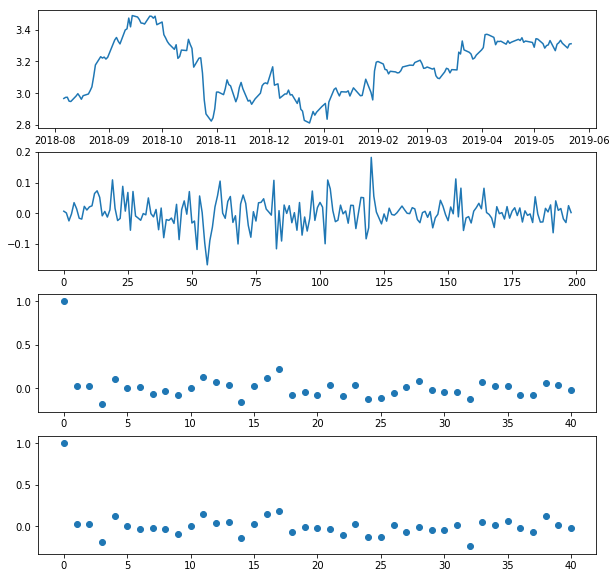

In [8]:
fig, axes = plt.subplots(4,1, figsize=(10,10))
axes[0].plot(t, x)
axes[1].plot(dx)
axes[2].scatter(np.arange(41), stattools.acf(dx))
axes[3].scatter(np.arange(41), stattools.pacf(dx)) 

p = stattools.adfuller(dx)[1]
print(p)

In [40]:
o=(2,1,2)
n = o[0]+o[2]+1
model = arima_model.ARIMA(xtrain, order=o)
results = model.fit(start_params=[.1]*n)
print(results.summary())
forecast = results.forecast(steps=25, alpha=.25)

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  174
Model:                 ARIMA(2, 1, 2)   Log Likelihood                 289.028
Method:                       css-mle   S.D. of innovations              0.046
Date:                Thu, 23 May 2019   AIC                           -566.057
Time:                        10:46:11   BIC                           -547.103
Sample:                             1   HQIC                          -558.368
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0021      0.004      0.550      0.583      -0.005       0.010
ar.L1.D.y     -0.8144      0.169     -4.818      0.000      -1.146      -0.483
ar.L2.D.y     -0.6282      0.218     -2.886      0.0

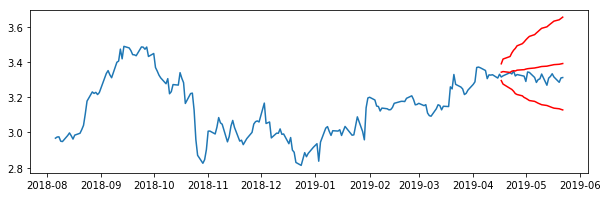

In [39]:
fig, axes = plt.subplots(1, 1, figsize=(10,3))

axes.plot(t, x)
axes.plot(t[175:], forecast[0], color='red')
axes.plot(t[175:], forecast[2][:,0], color='red')
axes.plot(t[175:], forecast[2][:,1], color='red')

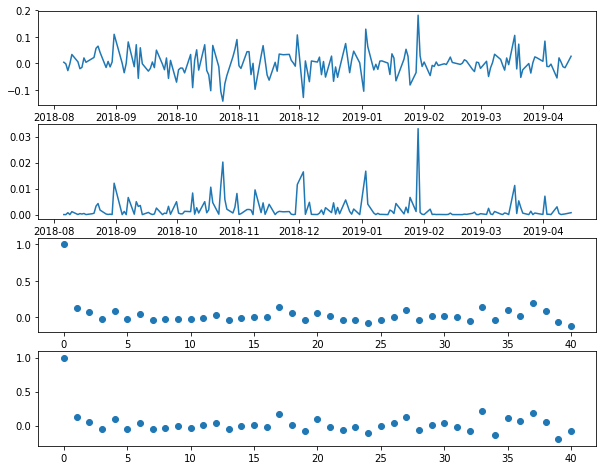

In [15]:
fig, axes = plt.subplots(4, 1, figsize=(10,8))

axes[0].plot(t[:174], results.resid)
axes[1].plot(t[:174], np.square(results.resid))
axes[2].scatter(np.arange(41), stattools.acf(np.square(results.resid)))
axes[3].scatter(np.arange(41), stattools.pacf(np.square(results.resid)))

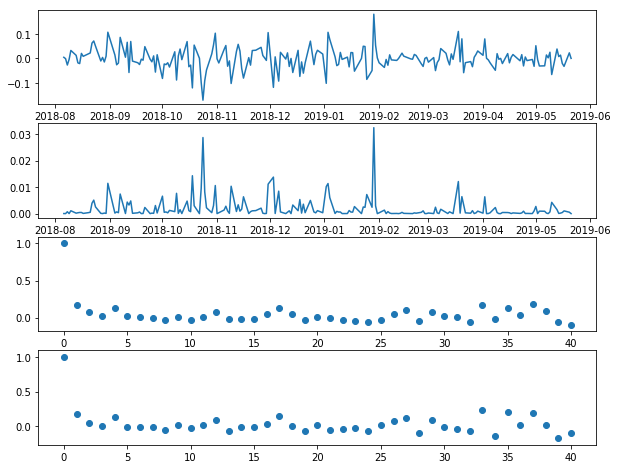

In [43]:
fig, axes = plt.subplots(4, 1, figsize=(10,8))

t1 = t[:-1]
s = dx-np.mean(dx)
axes[0].plot(t1, s)
axes[1].plot(t1, np.square(s))
axes[2].scatter(np.arange(41), stattools.acf(np.square(s)))
axes[3].scatter(np.arange(41), stattools.pacf(np.square(s)))